In [ ]:
!pip install transformers~=2.11.0
#!pip install transformers

     |████████████████████████████████| 674 kB 7.2 MB/s 
     |████████████████████████████████| 895 kB 56.6 MB/s 
     |████████████████████████████████| 5.6 MB 44.5 MB/s 
     |████████████████████████████████| 1.2 MB 55.6 MB/s 


In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla P100-PCIE-16GB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch


import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def text_preprocessing(text):

    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df_en = pd.read_csv('/content/drive/MyDrive/Thesis/without_stop_lemma_clean_english.csv')
#df_bn = pd.read_csv('/content/drive/MyDrive/Thesis/withoutstopstm_clean_bengali.csv')



df_en = pd.read_csv('/content/drive/MyDrive/Thesis/all_clean_english.csv')
df_bn = pd.read_csv('/content/drive/MyDrive/Thesis/all_clean_bengali.csv')

In [ ]:
df_en['text'] = df_en['text'].astype(str)
df_bn['text'] = df_bn['text'].astype(str)

In [ ]:
#df_en.drop( df_en[df_en.text.str.len() < 10].index, inplace=True)
df_en.drop( df_en[df_en.text.str.len() < 10].index, inplace=True)
df_en = df_en.dropna(axis=1)
df_en.drop_duplicates(inplace= True)
df_en.duplicated().sum()

#df_en.drop( df_en[df_en.text.str.len() < 10].index, inplace=True)
df_bn.drop( df_bn[df_bn.text.str.len() < 10].index, inplace=True)
df_bn = df_bn.dropna(axis=1)
df_bn.drop_duplicates(inplace= True)
df_bn.duplicated().sum()


0

In [ ]:
df_en.head()

,title,text,target
0,"Invoking religion, a more disciplined Trump sp...",invoking religion disciplined trump speaks uni...,1
1,Top Trump lieutenant Scaramucci lashes colleag...,top trump lieutenant scaramucci lash colleague...,1
2,Let Us Now Praise Famous Trumps,let u praise famous trump november 7 2016 1026...,0
3,U.S. seeks ship ban over North Korea violation...,u seek ship ban north korea violation moon pos...,1
4,Links 11/3/16,link 11316 november 3 2016 714 hostility towar...,0


In [ ]:

from sklearn.model_selection import train_test_split
from collections import Counter

X = df_en.text.values
y = df_en.target.values

X_en_train, X_en_val, y_en_train, y_en_val = train_test_split(X, y, random_state=42,test_size=0.3, stratify = y)


# we will use temp_text and temp_labels to create validation and test set
X_en_val, X_en_test, y_en_val, y_en_test = train_test_split(X_en_val, y_en_val, 
                                                                random_state=42, 
                                                                test_size=0.3,  stratify = y_en_val)

In [ ]:

from sklearn.model_selection import train_test_split
from collections import Counter

X = df_bn.text.values
y = df_bn.target.values

X_bn_train, X_bn_val, y_bn_train, y_bn_val = train_test_split(X, y, random_state=42,test_size=0.3, stratify = y)

# we will use temp_text and temp_labels to create validation and test set
X_bn_val, X_bn_test, y_bn_val, y_bn_test = train_test_split(X_bn_val, y_bn_val, 
                                                                random_state=42, 
                                                                test_size=0.3,  stratify = y_bn_val)



In [ ]:

X_train = np.concatenate((X_en_train, X_bn_train))
X_val = np.concatenate((X_en_val, X_bn_val))
X_test = np.concatenate((X_en_test, X_bn_test))

y_train = np.concatenate((y_en_train, y_bn_train))
y_val = np.concatenate((y_en_val, y_bn_val))
y_test = np.concatenate((y_en_test, y_bn_test))



In [ ]:
X_train.shape,X_val.shape, X_test.shape

((55650,), (16695,), (7156,))

In [ ]:
# Print sentence 0
print('Original: ', X[0])
print('Processed: ', text_preprocessing(X[0]))

Original:  ৮ দিনে ১৮ বিল পাস । দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে । কার্যত অধিবেশনই রয়েছে বর্তমান সরকারের । অক্টোবরের মাঝামাঝিতে সংক্ষিপ্ত অধিবেশন ডেকেই ‍ইিত টানা সংসেদর । এরপর ডিসেম্বরের শেষ সপ্তাহে একাদশ সংসদ নির্বাচনের সংখ্যাগরিষ্ঠতা পাবেন তারাই সরকার গঠন । জানুয়ারিতে বসতে সরকারের অধিবেশন । বর্তমান সরকারের পাঁচ বছর পূর্ণ বছরের ২৮ জানুয়ারি । সংবিধান অনুযায়ী বিদ্যমান সংসদ ভেঙে দেওয়ার আগের ৯০ দিনের পরবর্তী সংসদ নির্বাচন কথা রয়েছে । হিসেবে অক্টোবর নির্বাচনের কাউন ডাউন । সরকারের মহলের আলোচনার পরিপ্রেক্ষিতে ধারণা ২৮ অক্টোবরের মধ্য নির্বাচনকালীন সরকার গঠন । সরকার রুটিন ওয়ার্ক । দেশে উদ্বুদ্ধ পরিস্থিতির সৃষ্টি রাষ্ট্রপতি চাইলে যেকোনো সময় অধিবেশন আহ্বান । এদিকে দশম জাতীয় সংসদের ২২তম অধিবেশনটি রেকর্ডের খাতায় লেখা । কেননা অধিবেশনের আট কার্যদিবসের ইতোমধ্যেই ১৪টি বিল পাস হয়ে শেষ দিনে চারটি পাস । হিসেবে অনন্য উচ্চতায় অধিবেশন । এতো অল্প সময়ে সংখ্যক বিল পাসের নজির । গত ৯ সেপ্টেম্বর ২২তম অধিবেশন । ২০ সেপ্টেম্বর শেষ । শুক্র শনিবার বাদ দিয়ে টানা ১০ কার্যদিবস অধিবেশন । বর্তমান সংসদের ’ সদস্যের মৃত্যুতে শোক

In [ ]:
from transformers import XLMRobertaTokenizer

# Load the BERT tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

def preprocessing_for_bert(text, target):
  bert_input_ids = []
  bert_attention_masks = []
  label = []
  j=0

  for sent in text:
    tokens = tokenizer.encode_plus(text=text_preprocessing(sent), add_special_tokens=False)
    #tokens = tokenizer.encode_plus(sent, add_special_tokens=False)
    input_ids = tokens['input_ids'] 
    attention_mask = tokens['attention_mask']

    start = 0
    window_size = 510  # we take 2 off here so that we can fit in our [CLS] and [SEP] tokens
    total_len = len(input_ids) #1580

    loop = True

    while loop:
      end = start + window_size #510
      if end >= total_len: #false
        loop = False
        end = total_len
      # (1) extract window from input_ids and attention_mask
      input_ids_chunk = input_ids[start:end]
      attention_mask_chunk = attention_mask[start:end]
      # (2) add [CLS] and [SEP]
      input_ids_chunk = [101] + input_ids_chunk + [102]
      attention_mask_chunk = [1] + attention_mask_chunk + [1]
      # (3) add padding upto window_size + 2 (512) tokens
      input_ids_chunk += [0] * (window_size - len(input_ids_chunk) + 2)
      attention_mask_chunk += [0] * (window_size - len(attention_mask_chunk) + 2)
      # (4) format into PyTorch tensors dictionary

      
      input_dict = {
        'input_ids1': torch.Tensor([input_ids_chunk]).long(),
        'attention_mask1': torch.Tensor([attention_mask_chunk]).int()
      } 
        #print('2')
      bert_input_ids.append(input_dict['input_ids1'])
      
      
        # And its attention mask (simply differentiates padding from non-padding).
      bert_attention_masks.append(input_dict['attention_mask1'])
      

      label.append(target[j])

      start = end
    j=j+1

  # Convert the lists into tensors.
  bert_input_ids = torch.cat(bert_input_ids, dim=0)
  bert_attention_masks = torch.cat(bert_attention_masks, dim=0)



 
  # Print sentence 0, now as a list of IDs.
  print('Token IDs BERT:', bert_input_ids[1])

  return bert_input_ids,bert_attention_masks,label

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

In [ ]:
# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks, y_train = preprocessing_for_bert(X_train,y_train)


Token indices sequence length is longer than the specified maximum sequence length for this model (1077 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1289 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1175 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1016 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (531 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for

Tokenizing data...


Streaming output truncated to the last 5000 lines.
Token indices sequence length is longer than the specified maximum sequence length for this model (2551 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1340 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (810 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (633 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2143 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is lon

Token IDs BERT: tensor([   101,   8668,     34,  60636,   1129,     86,  64371,  30646,   5622,
        188183, 105876,    297, 143849,   1144,    127, 123046,  46132,  14380,
          3884,   3564, 145322,    141,   1305,   5416,   5911,     51, 106290,
            73,    939,   2806,  84751,  30646, 148814,   4488,  12996,   5844,
          2804,   3395,   1884,    375,    561,     67,  17664,     23,  30816,
        148814,  31895,   5700,  35829, 188183,   6897,  30646,   3638,   2804,
          2843,  18025,   2265, 182809,  23179,  32628,   1158,    306,  13580,
        146353,    214,    347,   6818,    350,   2804,    361,  44043,  21135,
          4568,  17431, 111245,    297,   1810, 126340,  14380,      8,   5259,
           297,  30646,  23179,  11737,  51065,  27983,   2577,  96704,    297,
         51957,   4488,  37772,   7228,  35011,   8447,    320, 185118,     51,
          5062,   1820,  53095,  13534,   2804,   4568,   5895,  51957,  16401,
          4420,     23, 

In [ ]:
print('labels:',len(y_train))
print('input_ids:',len(train_inputs))
print('attention_mask:',len(train_masks))

labels: 89439
input_ids: 89439
attention_mask: 89439


In [ ]:
val_inputs, val_masks, y_val= preprocessing_for_bert(X_val,y_val)

Streaming output truncated to the last 5000 lines.
Token indices sequence length is longer than the specified maximum sequence length for this model (4040 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (596 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (781 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1125 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (701 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is long

Token IDs BERT: tensor([   101,  69465,  54731,    223, 158930,   3525, 206249, 129004,    138,
            39, 167557,    316,  25842,   4122,  35461,    332, 121978,     19,
         24941, 113771, 168265,     71,   1324,     54,    885,  69465,  54731,
            34,  10002,      7, 127451,    108,   6958,  38648,    214,  25072,
        123997,   4039,     39,  59499,  26349,  17164,    102,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0, 

In [ ]:
test_inputs, test_masks, y_test = preprocessing_for_bert(X_test,y_test)


Token indices sequence length is longer than the specified maximum sequence length for this model (923 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (835 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (669 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2508 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Token IDs BERT: tensor([   101,  56136,     67,  12007,  49456,  12765,    400,  30922,     42,
          4343,   2046,    423,  91995,    674,   2926,  59038,  34391,  85358,
         99162,   2926, 107137, 126946,   7514,   3687, 118149, 118149,  84377,
            18,  78458,   9201,    297, 130473,   1632,   1733,    200,  14155,
          2412,   4517,  82230, 205277,  62816,  81502,   2258,      6, 180976,
         49878, 141475,   5675,  35710,  71834,  98845,      6,  23432,     19,
         12007,  14373,  13695,   7730, 130812, 174653,  26946,   7154, 199747,
          2320,  39395,    200,  14155,   2412,   4517,  12007,   5154,  45767,
          2046,  60268,  17431,  88669,   7086,  34391, 122122,  11343,  38075,
            13,  54529,    214,   2412,   4517,    200,  14155,   2412,   4517,
         50509, 146353,   1830,  20949,  77805,  10176,  26498, 105416,  17365,
         14277, 179804,   6620,     51, 109308,     53,    674,  13584,  26278,
        102908,   5117, 

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)


batch_size = 8

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_labels = torch.tensor(y_test)
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import XLMRobertaForSequenceClassification,XLMRobertaModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
    #def __init__(self, freeze_bert=True):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = XLMRobertaModel.from_pretrained("xlm-roberta-base")

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        #Freeze the BERT model
        if freeze_bert:
          for param in self.bert.parameters():
            param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
          num_labels)

        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 35 µs, sys: 2 µs, total: 37 µs
Wall time: 41 µs


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      #lr=4e-5,# 77.36    # Default learning rate
                      lr=2e-5,##last 69
                      #lr=3e-5,
                      #lr=1e-3,#63.53
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:

#There is a class imbalance in our dataset. The majority of the observations are not spam. 
#So, we will first compute class weights for the labels in the train set and then pass these weights to the loss function 
#so that it takes care of the class imbalance.
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

print("Class Weights:",class_weights)

Class Weights: [1.34011088 0.79757977]


In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

In [ ]:
class EarlyStopping(object):
    def __init__(self, mode='min', min_delta=0, patience=10, percentage=False):
        self.mode = mode
        self.min_delta = min_delta
        self.patience = patience
        self.best = None
        self.num_bad_epochs = 0
        self.is_better = None
        self._init_is_better(mode, min_delta, percentage)

        if patience == 0:
            self.is_better = lambda a, b: True
            self.step = lambda a: False

    def step(self, metrics):
        if self.best is None:
            self.best = metrics
            return False

        #if torch.isnan(metrics):
        if torch.isnan(torch.tensor(metrics)):
            return True

        if self.is_better(metrics, self.best):
            self.num_bad_epochs = 0
            self.best = metrics
        else:
            self.num_bad_epochs += 1

        if self.num_bad_epochs >= self.patience:
            return True

        return False

    def _init_is_better(self, mode, min_delta, percentage):
        if mode not in {'min', 'max'}:
            raise ValueError('mode ' + mode + ' is unknown!')
        if not percentage:
            if mode == 'min':
                self.is_better = lambda a, best: a < best - min_delta
            if mode == 'max':
                self.is_better = lambda a, best: a > best + min_delta
        else:
            if mode == 'min':
                self.is_better = lambda a, best: a < best - (
                            best * min_delta / 100)
            if mode == 'max':
                self.is_better = lambda a, best: a > best + (
                            best * min_delta / 100)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import time

# Specify loss function

loss_fn = nn.CrossEntropyLoss(weight=weights)


def set_seed(seed_value=100): #42
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    
def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
#def train(model,  early_stopping, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):

    """Train the BertClassifier model.
    """
    best_valid_loss = float('inf')
    bert_training_stats = []
    # Measure the total training time for the whole run.
    total_t0 = time.time()
    m=1

    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure how long the training epoch takes.
        t0 = time.time() #new-----------

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0) #new--------------

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        
        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0) #new-----------

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy, validation_time = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            


              

            # Record all statistics from this epoch.
            bert_training_stats.append({
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': val_loss,
                'Valid. Accur.': val_accuracy,
                'training time' : training_time,
                'validation time' : validation_time
                
                })

            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)


            if val_loss < best_valid_loss:
              best_valid_loss = val_loss
              print(m)
              torch.save(model.state_dict(), 'saved_weights.pt')
              m=m+1




            #if early_stopping.step(val_loss): 
              #print(m)
              #torch.save(model.state_dict(), 'saved_weights.pt')
              #m=m+1
              #break

        print("\n")
        print("  Training epcoh took: {:}".format(training_time))
        print("  Validation took: {:}".format(validation_time))
        print("\n")
    
    print("Training complete!")

    return bert_training_stats, model


def evaluate(model, val_dataloader):

    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.


    t0 = time.time() #new------------
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []
    loss = 0
    accuracy = 0

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)


    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0) #new---------------


    return val_loss, val_accuracy, validation_time

In [ ]:

set_seed(200)    # Set seed for reproducibility

bert_classifier, optimizer, scheduler = initialize_model(epochs=12)
#early_stopping = EarlyStopping(patience=3)
bert_training_stats, model = train(bert_classifier, EarlyStopping(patience=2), train_dataloader, val_dataloader, epochs=12, evaluation=True)



Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.728027   |     -      |     -     |   17.33  
   1    |   40    |   0.705813   |     -      |     -     |   16.73  
   1    |   60    |   0.692856   |     -      |     -     |   16.80  
   1    |   80    |   0.678964   |     -      |     -     |   17.14  
   1    |   100   |   0.687177   |     -      |     -     |   17.53  
   1    |   120   |   0.758331   |     -      |     -     |   17.42  
   1    |   140   |   0.673635   |     -      |     -     |   17.66  
   1    |   160   |   0.713665   |     -      |     -     |   18.28  
   1    |   180   |   0.691762   |     -      |     -     |   18.56  
   1    |   200   |   0.714137   |     -      |     -     |   18.96  
   1    |   220   |   0.715686   |     -      |     -     |   18.72  
   1    |   240   |   0.711270   |     -      |     -     |   18.57  


In [ ]:
set_seed(100)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=4)
bert_training_stats, model = train(bert_classifier, train_dataloader, val_dataloader, epochs=4, evaluation=True)


Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.670167   |     -      |     -     |   10.20  
   1    |   40    |   0.742537   |     -      |     -     |   9.62   
   1    |   60    |   0.686850   |     -      |     -     |   9.61   
   1    |   80    |   0.693789   |     -      |     -     |   9.61   
   1    |   100   |   0.675663   |     -      |     -     |   9.61   
   1    |   120   |   0.683649   |     -      |     -     |   9.61   
   1    |   140   |   0.699862   |     -      |     -     |   9.61   
   1    |   160   |   0.681096   |     -      |     -     |   9.62   
   1    |   180   |   0.687388   |     -      |     -     |   9.61   
   1    |   200   |   0.667903   |     -      |     -     |   9.61   
   1    |   220   |   0.636485   |     -      |     -     |   9.62   
   1    |   240   |   0.642539   |     -      |     -     |   9.61   


In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=bert_training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,training time,validation time
epoch,,,,,
1,0.38,0.29,90.81,1:29:16,0:08:17
2,0.26,0.23,91.89,1:29:02,0:08:16
3,0.21,0.22,92.38,1:28:53,0:08:16
4,0.20,0.26,92.48,1:28:59,0:08:16


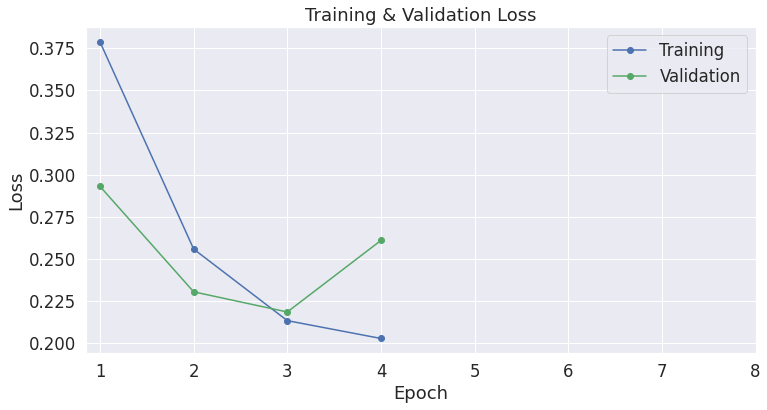

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8])

plt.show()

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return y_pred

AUC: 0.9765
Accuracy: 92.36%


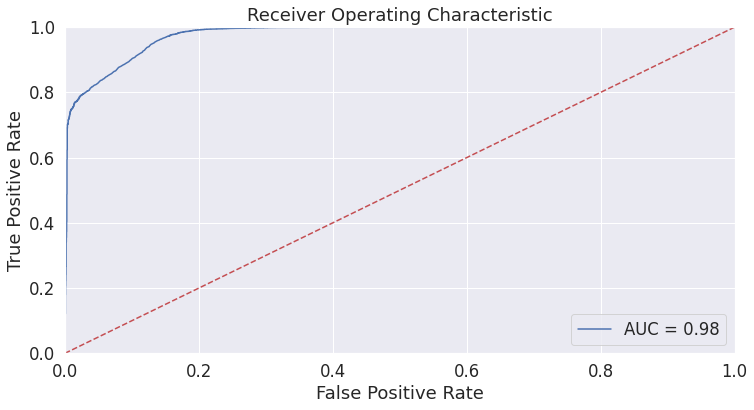

In [ ]:
from sklearn.metrics import classification_report
# Compute predicted probabilities on the test set
path = 'saved_weights.pt'
#roberta_classifier.load_state_dict(torch.load(path))
model.load_state_dict(torch.load(path))
#probs = bert_predict(bert_classifier, test_dataloader)
probs = bert_predict(model, test_dataloader)

#probs = bert_predict(new_model, test_dataloader)

# Evaluate the Bert classifier
y_pred = evaluate_roc(probs,y_test)

In [ ]:
data = ({'Original': y_test, 'Predicted': y_pred})

df_prediction = pd.DataFrame(data=data)

In [ ]:
df_prediction.head()

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1


In [ ]:
accuracy_score(y_test,y_pred)

0.9235511713933415

In [ ]:
from sklearn.metrics import classification_report
print(classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      4378
           1       0.91      0.97      0.94      6976

    accuracy                           0.92     11354
   macro avg       0.93      0.91      0.92     11354
weighted avg       0.93      0.92      0.92     11354



[[3694  684]
 [ 184 6792]]


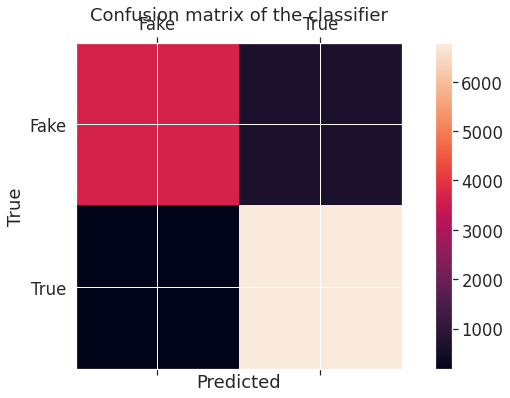

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['Fake','True']
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Prediction

In [ ]:
def predict (text):
  bert_input_ids = []
  bert_attention_masks = []
  sentence_ids = []
  counter = 0
  label = []
  j=0

  for sent in text:
    tokens = tokenizer.encode_plus(text=text_preprocessing(sent), add_special_tokens=False)
    input_ids = tokens['input_ids']
    attention_mask = tokens['attention_mask']

    start = 0
    window_size = 510  # we take 2 off here so that we can fit in our [CLS] and [SEP] tokens
    total_len = len(input_ids) #1580

    loop = True

    while loop:
      end = start + window_size #510
      if end >= total_len: #false
        loop = False
        end = total_len
      # (1) extract window from input_ids and attention_mask
      input_ids_chunk = input_ids[start:end]
      attention_mask_chunk = attention_mask[start:end]
      # (2) add [CLS] and [SEP]
      input_ids_chunk = [101] + input_ids_chunk + [102]
      attention_mask_chunk = [1] + attention_mask_chunk + [1]
      # (3) add padding upto window_size + 2 (512) tokens
      input_ids_chunk += [0] * (window_size - len(input_ids_chunk) + 2)
      attention_mask_chunk += [0] * (window_size - len(attention_mask_chunk) + 2)
      # (4) format into PyTorch tensors dictionary


      
      input_dict = {
        'input_ids1': torch.Tensor([input_ids_chunk]).long(),
        'attention_mask1': torch.Tensor([attention_mask_chunk]).int()
      } 
      
      bert_input_ids.append(input_dict['input_ids1'])
      
        # And its attention mask (simply differentiates padding from non-padding).
      bert_attention_masks.append(input_dict['attention_mask1'])

 
      
      start = end
    #j=j+1
  print(len(bert_input_ids))
  # Convert the lists into tensors.
  bert_input_ids = torch.cat(bert_input_ids, dim=0)
  bert_attention_masks = torch.cat(bert_attention_masks, dim=0)




  batch_size = 8  

  # Create the DataLoader.
  prediction_data = TensorDataset(bert_input_ids, bert_attention_masks)
  # prediction_data = TensorDataset(input_ids, attention_masks)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)


  # Compute predicted probabilities on the test set
  path = 'saved_weights.pt'
  model.load_state_dict(torch.load(path))
  #probs = bert_predict(bert_classifier, test_dataloader)
  probs = bert_predict(model, prediction_dataloader)
  # Get predictions from the probabilities
  threshold = 0.9
  preds = np.where(probs[:, 1] > threshold, 1, 0)
  print(preds)


  y_pred = np.bincount(preds).argmax()
  print(y_pred)
  

  #if max(y_pred,key=y_pred.count) ==1:
  if y_pred ==1:
    print('The news is true')
  else:
    print('The news is false')


  #return bert_input_ids,bert_attention_masks,labels

In [ ]:
sentence ="চিত্রনায়িকা পরীমনিকে আটক করে র‌্যাব সদর দপ্তরে নেওয়া হয়েছে। সেখানে তাঁকে জিজ্ঞাসাবাদ করছেন র‌্যাবের কর্মকর্তারা। আজ বুধবার রাতে পরীমনিকে রাজধানীর বনানীর বাসা থেকে আটক করা হয়। র‌্যাবের অতিরিক্ত মহাপরিচালক (অপারেশনস) কর্নেল কে এম আজাদ প্রথম আলোকে এ কথা জানান। তিনি বলেন, পরীমনিকে র‌্যাবের সদর দপ্তরে নেওয়ার পর তাঁকে জিজ্ঞাসাবাদ করা হচ্ছে। বেশ কিছু বিষয়ে বিস্তারিত জানার চেষ্টা চলছে। বিজ্ঞাপন কর্নেল কে এম আজাদ জানান, রাত সোয়া আটটার দিকে র‌্যাব সদস্যরা বনানীর বাসা থেকে পরীমনিকে নিয়ে র‌্যাব সদর দপ্তরের পথে রওনা হন। পরীমনির বাসা থেকে বিপুল পরিমাণে ওয়াইন, ভয়ংকর মাদক আইস, এলএসডি ও মাদক সেবনের সরঞ্জামাদি উদ্ধার করা হয়েছে। এর আগে আজ বিকেলে র‍্যাবের একটি দল পরীমনির বাসায় অভিযান চালায়। এ সময় ভেতর থেকে দরজা লাগিয়ে ফেসবুকে লাইভে আসেন পরীমনি। লাইভে তিনি বলেন, দিনদুপুরে কে বা কারা তাঁর বাসায় আক্রমণ করেছে। তিনি থানা-পুলিশ, ডিবির কর্মকর্তা ও তাঁর পরিচিতজনদের কাছে ফোন করে তাঁকে বাঁচানোর আহ্বান জানান। বারবার র‍্যাব সদস্যরা পরিচয় দিলেও ভেতর থেকে দরজা খুলছিলেন না তিনি। বিকেল ৪ টা ৩৫ মিনিটে দরজা খুলে দেওয়া হলে র‍্যাব সদস্যরা ভেতরে ঢোকেন। এরপর শুরু হয় তল্লাশি।পরে একপর্যায়ের পরীমনিকে আটক করা হয়। র‌্যাব সদস্যরা নানা বিষয়ে তাঁকে জিজ্ঞাসাবাদ শুরু করেন। র‌্যাব সূত্র জানায়, সম্প্রতি হেলেনা জাহাঙ্গীর, ফারিয়া মাহাবুব পিয়াসা ও মরিয়ম আক্তার মৌকে গ্রেপ্তারের ঘটনার ধারাবাহিকতায় চিত্রনায়িকা পরীমনির বাসায় অভিযান চালানো হয়।"

In [ ]:
predict (sentence)

1303
[1 1 1 ... 1 1 0]
1
The news is true


In [ ]:
from bs4 import BeautifulSoup
import re 
import nltk

nltk.download("stopwords")   
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords 
lemma = nltk.WordNetLemmatizer()

# function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()


# function to remove accented characters
import unicodedata
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9,!?/:;\"\'\s€]' 
    return re.sub(pat, '', text)
 
import string
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text


# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()



#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

#Total function
def en_cleaning(text):
    text = remove_html_tags(text)
    text = decontracted(text)    
    text = remove_accented_chars(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    text = remove_extra_whitespace_tabs(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

#Apply function on text column

sentence = en_cleaning(sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from bs4 import BeautifulSoup
import re 

from bnlp.corpus import stopwords, punctuations, letters, digits
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

#from bnltk.stemmer import BanglaStemmer

import banglanltk as bn

# function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()


 
import string
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text


# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

def remove_bn_stopwords(text):
    final_text = []
    text = remove_stopwords(text, stopwords)
        
    for word in text:
      text = remove_stopwords(word, stopwords)
      final_text.append(word)
    return " ".join(final_text)





def bn_lemmatization(text):

    #text1 = bn.stemmer(text)
    return bn.stemmer(text)




#Total function
def bn_cleaning(text):
    text = remove_html_tags(text)
  
    text = remove_bn_stopwords(text)
    text = bn_lemmatization(text)
    text = remove_punctuation(text)
    text = remove_extra_whitespace_tabs(text)
  
    return text

#Apply function on text column

sentence = bn_cleaning(sentence)

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
!pip install bnlp_toolkit
!pip install banglanltk

     |████████████████████████████████| 23.9 MB 92.7 MB/s 
     |████████████████████████████████| 743 kB 61.9 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 462 kB 5.1 MB/s 
